In [38]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [40]:
os.listdir('stats')

['deepseek.txt', 'gemma3.txt', 'llama.txt']

In [49]:
df = {}
for filename in os.listdir('stats'):
    #initialize data frame
    columns = ['total duration','load duration', 'prompt eval count', 'prompt eval duration','prompt eval rate','eval count','eval duration','eval rate']
    rows = []
    current_row = []
    with open(filename, 'r') as file:
        for line in file:
            pattern = r"\s(\d+m)?(\d+(\.?\d+)?)"
            result = re.search(pattern, line)
            if not result:
                continue
            result = result.groups()
            if result[0] != None:
                minutes = int(result[0][:-1])
                seconds = float(result[1])
                current_row.append(minutes*60 + seconds)
            else:
                current_row.append(result[1])
            if len(current_row) == len(columns):
                rows.append(current_row)
                current_row = []
    #readlines, feed int othe reg expression, if there is mins, mult by 60 and add, then add that to the dataframe, if no mins, just add the secions into the dataframe
    
    df[filename] = pd.DataFrame(rows, columns=columns)
print(df)


{'deepseek.txt':    total duration load duration prompt eval count prompt eval duration  \
0    52.174291698   5.784189167                 9            412.62666   
1    41.265726893     13.870002                31          1.497430764   
2      209.968987     13.603952                33          1.610630968   
3       93.305495     14.060707                25          1.231209293   
4    43.460212281     21.217541                17           842.117357   
5      162.745018     13.585457                15           733.407037   
6      101.878742     14.965472                14           692.177141   
7      174.145475      13.94048                12           588.933392   
8        65.11604     14.419202                18           902.759383   
9      123.450595     14.014099                10           490.495889   
10     319.679117     14.152983                50          2.516208417   
11      72.338122     14.218967                 8           384.442165   
12     700.247432    

In [48]:
#Histogram of eval rate for deepseek.txt

df['deepseek.txt'[7]] = pd.to_numeric(df['deepseek.txt'[7]])  # Convert or set invalids to NaN, likelt means our data is messy

sns.histplot(df['deepseek.txt'[7]], bins=10, kde=True)
plt.title("Distribution of Evaluation Times")
plt.xlabel("Eval Time (seconds)")
plt.ylabel("Frequency")
plt.show()


KeyError: 'k'

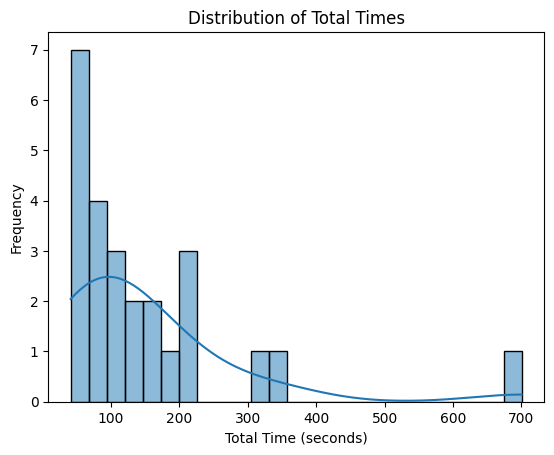

In [37]:
#Histogram of eval rate

df['total duration'] = pd.to_numeric(df['total duration'])  # Convert or set invalids to NaN, likelt means our data is messy

sns.histplot(df['total duration'], bins=25, kde=True)
plt.title("Distribution of Total Times")
plt.xlabel("Total Time (seconds)")
plt.ylabel("Frequency")
plt.show()


In [2]:
import re

text = ' 6.34235235s'
pattern = r'\s(\d+m)?(\d+(\.?\d+)?)'
result = re.search(pattern, text)
result.groups()

(None, '6.34235235', '.34235235')